### 타이타닉 생존자 예측

In [134]:
!pip install sklearn

### EDA 탐색적 데이터 분석 

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
titanic_df = pd.read_csv('./dataset/train.csv')

In [137]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 컬럼 내용

Variable	Definition	Key
survival:	Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age	: Age in years	
sibsp : 	# of siblings / spouses aboard the Titanic	
parch :	# of parents / children aboard the Titanic	
ticket :	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [138]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
titanic_df['Age'].fillna(titanic_df["Age"].mean(),inplace=True)
titanic_df["Cabin"].fillna('N',inplace=True)
titanic_df["Embarked"].fillna('N',inplace=True)
print("null 갯수:", titanic_df.isnull().sum())

null 갯수: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [141]:
print(f"성별분포 : \n {titanic_df['Sex'].value_counts()}")
print(f"\n 선실 분포: \n {titanic_df['Cabin'].value_counts()}")
print(f"\n 승선지 분포: \n {titanic_df['Embarked'].value_counts()}")

성별분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 선실 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 승선지 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [142]:
titanic_df['Carbin'] = titanic_df['Cabin'].str[:1]
print(titanic_df["Carbin"].head())

0    N
1    C
2    N
3    C
4    N
Name: Carbin, dtype: object


In [143]:
titanic_df['Carbin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Carbin, dtype: int64

In [144]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

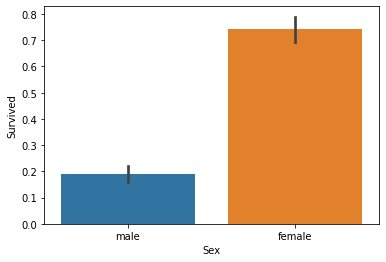

In [145]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

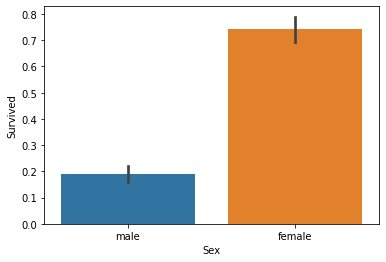

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

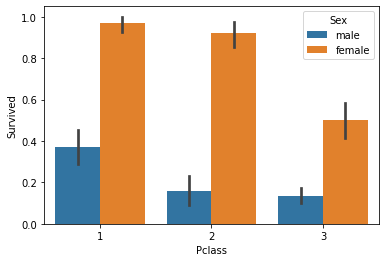

In [146]:
plt.show()
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.show()
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

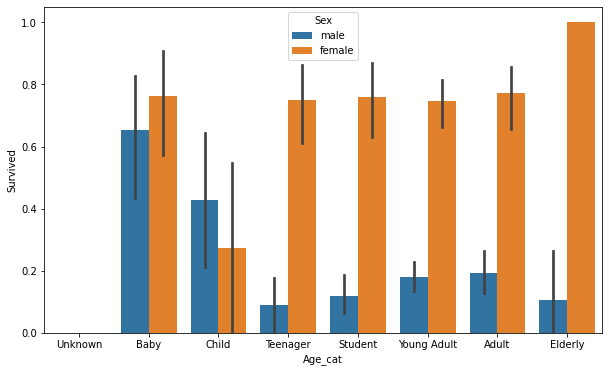

In [147]:
def get_category(age):
  cat = " "
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = "Baby"
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly' 

  return cat

#막대그래프
plt.figure(figsize=(10,6))
group_names=["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names) #검은색 줄은 신뢰구간, 즉 오차막대다 
titanic_df.drop('Age_cat',axis=1,inplace=True)

#### 인코딩 하기 

In [148]:
from sklearn import preprocessing 

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
    
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Carbin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3,N


## 예측모델 찾아보기 

### 클래스 만들기

In [149]:
from sklearn.preprocessing import LabelEncoder

class prepro ():
  def __init__(self): 
    self

  #널처리 함수
  def fillna(self,df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Carbin'].fillna('N',inplace = True)
    df['Embarked'].fillna('N', inplace=True) 
    df['Fare']. fillna(0,inplace=True)

  #머신러닝에 불필요한 속성 제거 
  def drop_features(self,df):
    df.drop(['Passengerld','Name','Ticket'],axis=1,inplace = True)
    return df 

  #레이블 인코딩 수행 
  def format_features(self,df):
    df['Carbin'] = df['Carbin'].str[ :1]
    for feature in features:
      le = LabelEncoder()
      le = le.fit(df[feature])
      df[feature] = le.transform(df[feature])

  #앞에서 설정한 Data Preprocessing 함수 호출 
  def transfrom_features(self,df):
    df = fillna(df)
    df = drop_features(df)
    df =format_features(df)
    return df


### 함수 만들기 (디펙토링하기)

In [150]:
from sklearn.preprocessing import LabelEncoder


def fillna(df):
   df['Age'].fillna(df['Age'].mean(),inplace = True)
   df['Cabin'].fillna('N',inplace = True)
   df['Embarked'].fillna('N', inplace=True) 
   df['Fare']. fillna(0,inplace=True)
   return df

#머신러닝에 불필요한 속성 제거 
def drop_features(df):
   df.drop(['PassengerId','Name','Ticket'],axis= 1,inplace = True)
   return df #리턴하지 않으면 오류가 난다. 

#레이블 인코딩 수행 
def format_features(df):
   df['Cabin'] = df['Cabin'].str[ :1]
   features = ['Cabin', 'Sex','Embarked'] 
   for feature in features:
     le = LabelEncoder()
     le = le.fit(df[feature])
     df[feature] = le.transform(df[feature])
   return df #def는 리턴해주지 않으면 결과값이 출력되지 않는다.  
     
#앞에서 설정한 Data Preprocessing 함수 호출 
def transform_features(df):
   df = fillna(df)
   df = drop_features(df)
   df = format_features(df)
   return df

### desicionTreeClassifier vs RandomFroest vs Logistic 비교


In [ ]:
y_titanic_df = titanic_df['Survived'] #레이블 값 만들어 Y값 데이터로 저장 
x_titanic_df = titanic_df.drop(['Survived'],axis=1) #레이블값을 제외한 인풋값 저장 
x_titanic_df = transform_features(x_titanic_df) #라벨인코딩 함수 실행
x_titanic_df #전처리 잘 됐는지 한번 확인해주기 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_titanic_df,y_titanic_df, test_size=0.2,random_state= 42)

#분석에 사용할 알고리즘 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#정확도 검정에 사용할 알고리즘
from sklearn.metrics import accuracy_score

#클래스 선언 
dt_clf = DecisionTreeClassifier(random_state=42)
rt_clf = RandomForestClassifier(random_state=42)
lt_clf= LogisticRegression() 
# print(x_train)
# DecisionTreeClassifier 학습 / 예측 / 평가 
dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)
print(f"RandomForestClassifier 정확도: {accuracy_score(y_test,dt_pred): 4f}")

#RandomForestClassifier 학습/예측/평가 
rt_clf.fit(x_train,y_train)
rt_pred = rt_clf.predict(x_test)
print(f"DecisionTreeClassifier 정확도: {accuracy_score(y_test,rt_pred): 4f}")

#LogisticRegression 학습/예측/평가 
lt_clf.fit(x_train,y_train)
lt_pred = lt_clf.predict(x_test)
print(f"LogisticRegression 정확도: {accuracy_score(y_test,lt_pred): 4f}")

RandomForestClassifier 정확도:  0.770950
DecisionTreeClassifier 정확도:  0.804469
LogisticRegression 정확도:  0.821229


C:\Users\JIHYUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------

In [ ]:
y_titanic_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #5개의 폴드 세트를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores=[]

    #KFold 교차 검증 수행 
    for iter_count,(train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index],x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]

    #Classifier 학습/예측/정확도 계산 
    clf.fit(x_train, y_train)

    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차검증: {0}, 정확도 : {1: 4f}'.format(iter_count, accuracy))
    

    #5개 fold에서의 평균 정확도 계산 
    mean_score = np.mean(scores)
    print("평균 정확도 : {0: 4f}".format(mean_score))


#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차검증: 4, 정확도 :  0.831461
평균 정확도 :  0.831461


-----


In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5) #k폴드의 k처럼 분할하는 데이터셋 
for iter_count,accuracy in enumerate(scores):
    print(f"교차검증 {iter_count} 정확도:{accuracy}")
    
print(f"평균정확도 : {np.mean(scores)}")

교차검증 0 정확도:0.7653631284916201
교차검증 1 정확도:0.7808988764044944
교차검증 2 정확도:0.797752808988764
교차검증 3 정확도:0.7752808988764045
교차검증 4 정확도:0.8258426966292135
평균정확도 : 0.7890276818780994


## 정밀도와 재현율 구하기 


In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차행렬", confusion)
    print(f"정확도: {accuracy} 정밀도 :{precision}, 재현율 : {recall} ")

In [161]:

import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis =1 )
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차행렬 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도 :0.7741935483870968, 재현율 : 0.7868852459016393 


C:\Users\JIHYUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 분류 결정 임곗값에 따른 positive 예측 변화 

In [162]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print(f"pred_proba()결과 shape {pred_proba.shape}")
print(f'pred_proba array에서 앞 3개만 샘플로 추출 \n : {pred_proba[:3]}') #앞이 0, 뒤가 1이 될 확률 

#예측 확률 array와 예측 결과값 array를 concatenate 하여 예측확률과 결과값을 한눈에 확인 
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(f'두개의 class 중에서 더 큰 활률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 : [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]
두개의 class 중에서 더 큰 활률을 클래스 값으로 예측 
 [[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


In [163]:
#----
#Binarizer 활용 

from sklearn.preprocessing import Binarizer

x=[[1,-1,2],
    [2,0,0],    
    [0,1.1,1.2]]


#threshold 기준값보다 같거나 작으면 0을, 크면 1을 변환 
Binarizer = Binarizer(threshold=1.1)
print(Binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [165]:
#Binarizer 활용해서 분류 결정 임곗값에 따른 예측 확률 변화 확인하기 

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임곗값이다. 
custom_threshold = 0.5  

# predict_proba()의 반환값의 두번째 칼럼, 즉 positive 클래스 컬럼 하나만 추출하여 Binarizer 적용하기 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

#threshold 기준값보다 같거나 작으면 0을, 크면 1을 변환 
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도 :0.7741935483870968, 재현율 : 0.7868852459016393 


In [166]:
#설정 임곗값을 0.4로 설정하면? 


from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임곗값이다. 
custom_threshold = 0.4

# predict_proba()의 반환값의 두번째 칼럼, 즉 positive 클래스 컬럼 하나만 추출하여 Binarizer 적용하기 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

#threshold 기준값보다 같거나 작으면 0을, 크면 1을 변환 
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬 [[98 20]
 [10 51]]
정확도: 0.8324022346368715 정밀도 :0.7183098591549296, 재현율 : 0.8360655737704918 


In [169]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장 

thresholds = [0.4, 0.45, 0.50, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #threshols list 객체내의 값을 차례로 iteration하면서 Evauation 수행 
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값 : 0.4
오차행렬 [[98 20]
 [10 51]]
정확도: 0.8324022346368715 정밀도 :0.7183098591549296, 재현율 : 0.8360655737704918 
임계값 : 0.45
오차행렬 [[103  15]
 [ 12  49]]
정확도: 0.8491620111731844 정밀도 :0.765625, 재현율 : 0.8032786885245902 
임계값 : 0.5
오차행렬 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도 :0.7741935483870968, 재현율 : 0.7868852459016393 
임계값 : 0.6
오차행렬 [[112   6]
 [ 16  45]]
정확도: 0.8770949720670391 정밀도 :0.8823529411764706, 재현율 : 0.7377049180327869 


### precision_recall_curve()를 이용하여 임곗값에 따른 정밀도 - 재현율 값 추출 

In [173]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(f'반환된 분류 결정 임곗값 배열의 shape: {thresholds.shape}')
print(f'반환된 precisions 배열의 shape:', precisions.shape)
print(f'반환된 recalls 배열의 shape {recalls.shape}')

print(f'thresholds 5 sample: {thresholds[:5]}')
print(f'precisions 5 sample {thresholds[:5]}')
print(f'recalls 5 sample {recalls[:5]}')


반환된 분류 결정 임곗값 배열의 shape: (143,)
반환된 precisions 배열의 shape: (144,)
반환된 recalls 배열의 shape (144,)
thresholds 5 sample: [0.10394781 0.10395007 0.10397544 0.10773598 0.10892335]
precisions 5 sample [0.10394781 0.10395007 0.10397544 0.10773598 0.10892335]
recalls 5 sample [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [174]:
#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출 
thr_index = np.arange(0, thresholds.shape[0], 15)
print(f'샘플 추출을 위한 임계값 배열의 index 10개 {thr_index}')
print(f'샘플용 10개의 임곗값: {np.round(thresholds[thr_index],2)}')


샘플 추출을 위한 임계값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [175]:
#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print(f'샘플 임계값별 정밀도: {np.round(thresholds[thr_index],3)}')
print(f'샘플용 10개의 재현율: {np.round(recalls[thr_index],3)}')



샘플 임계값별 정밀도: [0.104 0.121 0.14  0.186 0.28  0.403 0.564 0.667 0.822 0.947]
샘플용 10개의 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


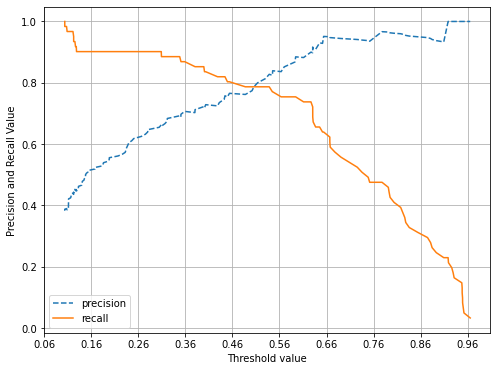

In [181]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndrray 추출 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #x축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시 
    plt.figure(figsize= (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    #threshold값 x축의 scale을 0,1단위로 변경 
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))


    #x축 , y축, label과 legend 그리고 grid 설정 
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])


### ROC 곡선과 AUC 

### ROC 곡선 

In [182]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1스코어: {f1:4f}')


F1스코어: 0.780488


In [184]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)

    #F1 스코어 추가 
    f1 = f1_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    #f1 score print 추가 
    print(f'정확도 {accuracy}, 정밀도{precision},재현율{recall}, f1{f1}')

thresholds = [0.4, 0.45, 0.50, 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 0.8324022346368715, 정밀도0.7183098591549296,재현율0.8360655737704918, f10.7727272727272727
임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 0.8491620111731844, 정밀도0.765625,재현율0.8032786885245902, f10.784
임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 0.8491620111731844, 정밀도0.7741935483870968,재현율0.7868852459016393, f10.7804878048780488
임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 0.8770949720670391, 정밀도0.8823529411764706,재현율0.7377049180327869, f10.8035714285714285


### 사이킥런 ROC 곡선 및 AUC 스코어 

In [186]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출 
#thresholds[0]은 max(예측확률)+1로 임의 설정된다. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index =np.arange(1, thresholds.shape[0],5)
print(f'샘플 추출을 위한 임곗값 배열의 index:{thr_index}')
print(f'샘플 index로 추출한 임곗값:{np.round(thresholds[thr_index],2)}')


#5 step 단위로 추출된 임계값에 따른 FPR, TPR 값 
print(f'샘플 임계값별 FPR:{np.round(fprs[thr_index],3)}')
print(f'샘플 임계값별 TRP:{np.round(tprs[thr_index],3)}')


샘플 추출을 위한 임곗값 배열의 index:[ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR:[0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TRP:[0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


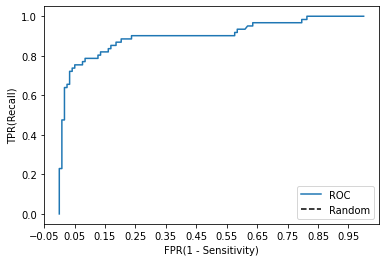

In [187]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을 반환 발음. 
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    #ROC Curve를 plot곡선으로 그림
    plt.plot(fprs, tprs,label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0.1],[0.1],'k--',label='Random')

    #FPR x축의 Scale을 0.1 단위로 변경, X,y 축명 설정 등 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('FPR(1 - Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test,lr_clf.predict_proba(x_test)[:,1])

In [188]:
from sklearn.metrics import roc_auc_score

#pred = lr_clf.predic(x_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값 {format(roc_score)}')

ROC AUC 값 0.9024034454015005
